In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d1x = np.array(sorted([163, 12, 23, 311, 44, 75, 82, 122, 219, 247, 5, 251, 118, 1774, 1]))
d2x = np.array(sorted([440, 2946, 227, 143, 550, 32, 293, 137, 157, 151, 4, 14, 174, 1797, 2776]))
d3x = np.array(sorted([3026, 2053, 1538, 242, 239, 238, 6, 162, 1069, 50, 59, 602, 780, 1633, 1805]))
# d4x = np.array(sorted([2165, 2918, 1198, 1655, 4449, 4795, 3702, 4417, 3698, 3117, 3556, 2362, 2160, 4322, 2364]))

In [3]:
d1x = d1x.reshape((15, 1, 1))
d2x = d2x.reshape((15, 1, 1))
d3x = d3x.reshape((15, 1, 1))
# d4x = d4x.reshape((15, 1, 1))

In [4]:
d1y = np.append(d1x[1:], d1x[0])
d2y = np.append(d2x[1:], d2x[0])
d3y = np.append(d3x[1:], d3x[0])
# d4y = np.append(d4x[1:], d4x[0])

In [5]:
from keras.models import Sequential
from keras.layers import GRU, Dense

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(GRU(8, batch_input_shape=(1, d1x.shape[1], d1x.shape[2]), stateful=True, return_sequences=True))
model.add(GRU(64, stateful=True, return_sequences=True))
model.add(GRU(128, stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (1, 1, 8)                 240       
_________________________________________________________________
gru_2 (GRU)                  (1, 1, 64)                14016     
_________________________________________________________________
gru_3 (GRU)                  (1, 128)                  74112     
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    129       
Total params: 88,497.0
Trainable params: 88,497
Non-trainable params: 0.0
_________________________________________________________________


In [7]:
loss_history = []

In [8]:
for i in range(500):
    h = model.fit(d2x, d2y, epochs=1, verbose=0, shuffle=False, batch_size=1)
    model.reset_states()
    loss_history.append(h.history['loss'][0])
    if i % 25 == 0:
        print("Epoch: {}, loss: {}".format(i, loss_history[-1]))

Epoch: 0, loss: 1339147.4893005372


KeyboardInterrupt: 

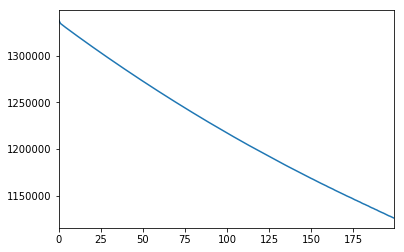

In [26]:
pd.Series(loss_history).plot()